# **Model per Level**

The goal of this notebook is to train one model instance of our best model (PPO with L2) for each environment without curriculum learning, to understand if it really learns faster with exploration.

In [2]:
import numpy as np
import gymnasium as gym
from coverage_env import CoverageEnv
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from torch.optim import AdamW

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import matplotlib.pyplot as plt

In [2]:
env_0 = CoverageEnv(curriculum=0)
env_1 = CoverageEnv(curriculum=1)
env_2 = CoverageEnv(curriculum=2)
env_3 = CoverageEnv(curriculum=3)
env_4 = CoverageEnv(curriculum=4)

In [3]:
policy_kwargs = dict(
    optimizer_class  = AdamW,
    optimizer_kwargs = dict(
        weight_decay = 1e-4
    )
)

# **Environment 0**

In [4]:
model = PPO(
    "MlpPolicy",
    env_0,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/general/coverage_lvl0",
)

# train for 500k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/general/coverage_lvl0")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/general/coverage_lvl0/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -185     |
| time/              |          |
|    fps             | 6763     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 173         |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 3841        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015603286 |
|    clip_fraction        | 0.0853      |
|    clip_range   

/Users/pedropertusi/Desktop/reinforcement-learning/Coverage-Path-Planning/env/lib/python3.12/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path 'models/general' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


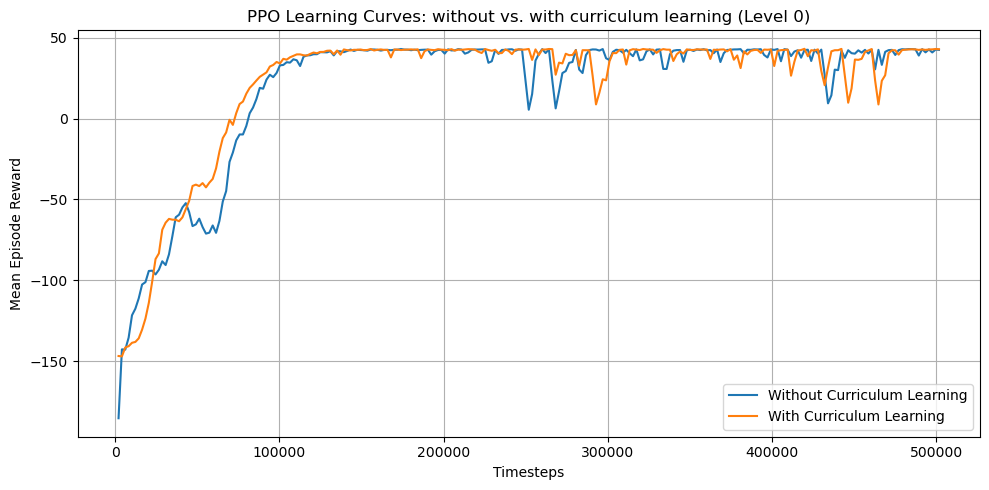

In [8]:
log_dirs = [
    ("logs/general/coverage_lvl0/PPO_1", "Without Curriculum Learning"),
    ("logs/ppo/mlp/l2/coverage_lvl0/PPO_1", "With Curriculum Learning"),
]

plt.figure(figsize=(10, 5))

for path, label in log_dirs:
    # pick the first run subfolder
    run_id = os.listdir(path)[0]
    event_path = os.path.join(path, run_id)

    # load TB scalars
    ea = EventAccumulator(event_path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")

    # extract steps & values
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    # plot
    plt.plot(steps, values, label=label)

plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO Learning Curves: without vs. with curriculum learning (Level 0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
mean_reward, std_reward = evaluate_policy(
    model,
    env_0,
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

/Users/pedropertusi/Desktop/reinforcement-learning/Coverage-Path-Planning/env/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 21.00 ± 68.67


# **Environment 1**

In [7]:
model = PPO(
    "MlpPolicy",
    env_1,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/general/coverage_lvl1",
)

# train for 500k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/general/coverage_lvl1")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/general/coverage_lvl1/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 175      |
|    ep_rew_mean     | -132     |
| time/              |          |
|    fps             | 6993     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 162        |
|    ep_rew_mean          | -118       |
| time/                   |            |
|    fps                  | 3948       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01732592 |
|    clip_fraction        | 0.0541     |
|    clip_range           | 0.

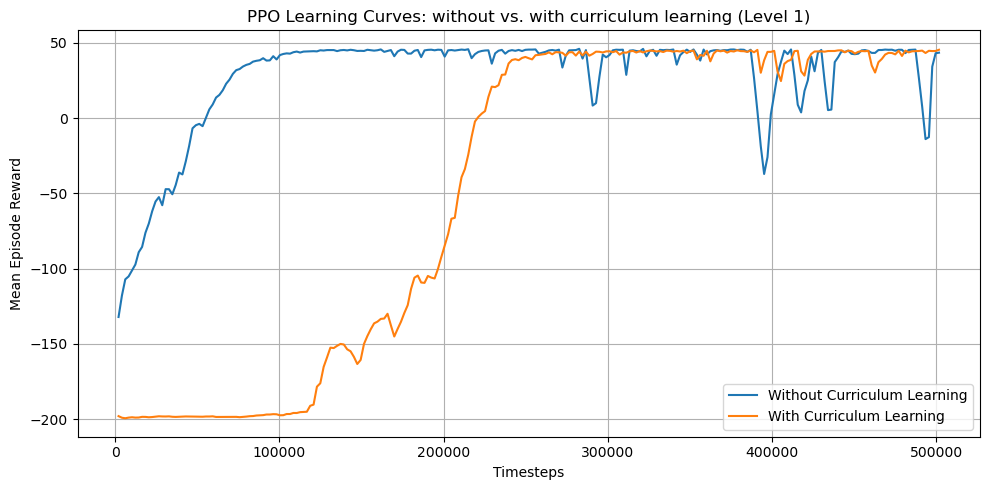

In [4]:
log_dirs = [
    ("logs/general/coverage_lvl1/PPO_1", "Without Curriculum Learning"),
    ("logs/ppo/mlp/l2/coverage_lvl1/PPO_1", "With Curriculum Learning"),
]

plt.figure(figsize=(10, 5))

for path, label in log_dirs:
    # pick the first run subfolder
    run_id = os.listdir(path)[0]
    event_path = os.path.join(path, run_id)

    # load TB scalars
    ea = EventAccumulator(event_path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")

    # extract steps & values
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    # plot
    plt.plot(steps, values, label=label)

plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO Learning Curves: without vs. with curriculum learning (Level 1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
mean_reward, std_reward = evaluate_policy(
    model,
    env_1,
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Mean reward: 45.60 ± 1.56


# **Environment 2**

In [10]:
model = PPO(
    "MlpPolicy",
    env_2,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/general/coverage_lvl2",
)

# train for 500k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/general/coverage_lvl2")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/general/coverage_lvl2/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 175      |
|    ep_rew_mean     | -159     |
| time/              |          |
|    fps             | 6606     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 136         |
|    ep_rew_mean          | -105        |
| time/                   |             |
|    fps                  | 3946        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017258856 |
|    clip_fraction        | 0.0643      |
|    clip_range   

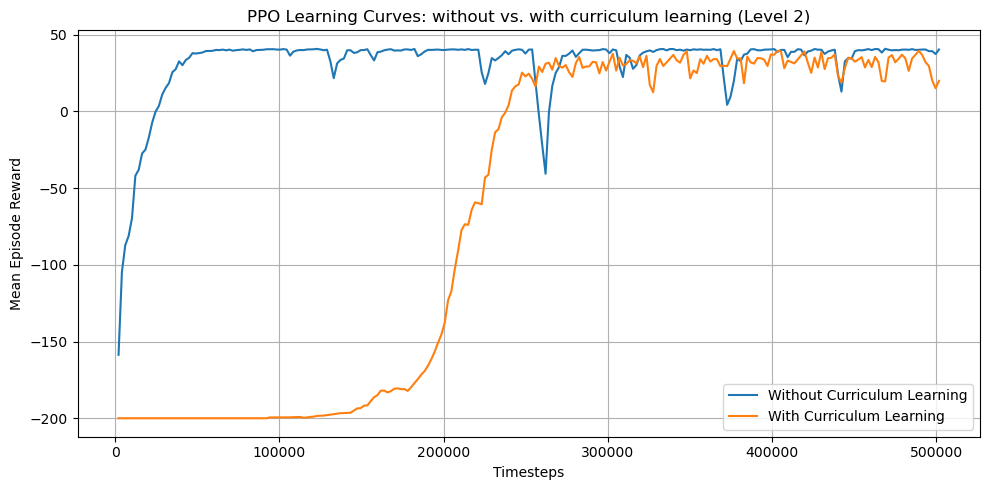

In [5]:
log_dirs = [
    ("logs/general/coverage_lvl2/PPO_1", "Without Curriculum Learning"),
    ("logs/ppo/mlp/l2/coverage_lvl2/PPO_1", "With Curriculum Learning"),
]

plt.figure(figsize=(10, 5))

for path, label in log_dirs:
    # pick the first run subfolder
    run_id = os.listdir(path)[0]
    event_path = os.path.join(path, run_id)

    # load TB scalars
    ea = EventAccumulator(event_path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")

    # extract steps & values
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    # plot
    plt.plot(steps, values, label=label)

plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO Learning Curves: without vs. with curriculum learning (Level 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
mean_reward, std_reward = evaluate_policy(
    model,
    env_2,
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Mean reward: 39.70 ± 2.05


# **Environment 3**

In [13]:
model = PPO(
    "MlpPolicy",
    env_3,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/general/coverage_lvl3",
)

# train for 500k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/general/coverage_lvl3")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/general/coverage_lvl3/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 185      |
|    ep_rew_mean     | -165     |
| time/              |          |
|    fps             | 6746     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 157         |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 3981        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018264329 |
|    clip_fraction        | 0.0935      |
|    clip_range   

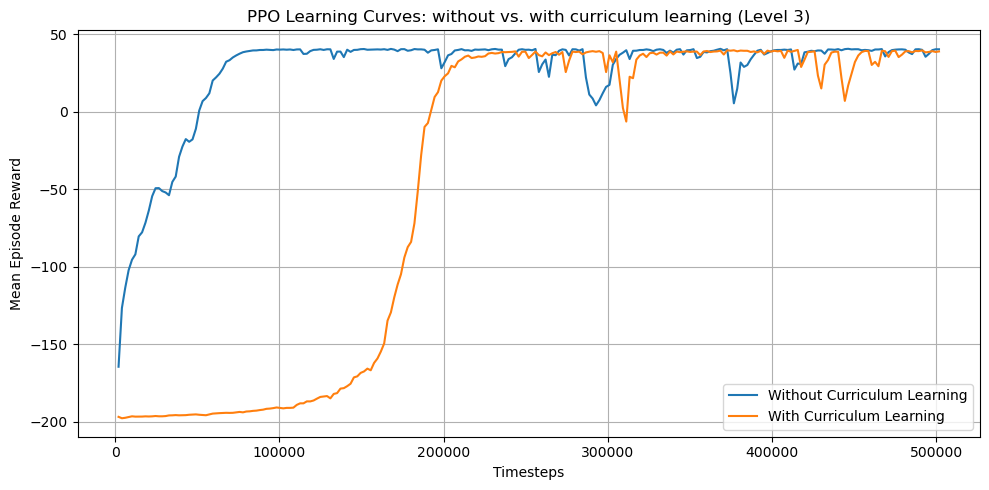

In [6]:
log_dirs = [
    ("logs/general/coverage_lvl3/PPO_1", "Without Curriculum Learning"),
    ("logs/ppo/mlp/l2/coverage_lvl3/PPO_1", "With Curriculum Learning"),
]

plt.figure(figsize=(10, 5))

for path, label in log_dirs:
    # pick the first run subfolder
    run_id = os.listdir(path)[0]
    event_path = os.path.join(path, run_id)

    # load TB scalars
    ea = EventAccumulator(event_path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")

    # extract steps & values
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    # plot
    plt.plot(steps, values, label=label)

plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO Learning Curves: without vs. with curriculum learning (Level 3)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
mean_reward, std_reward = evaluate_policy(
    model,
    env_3,
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Mean reward: 40.40 ± 2.11


# **Environment 4**

In [16]:
model = PPO(
    "MlpPolicy",
    env_4,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/general/coverage_lvl4",
)

# train for 500k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/general/coverage_lvl4")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/general/coverage_lvl4/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 194      |
|    ep_rew_mean     | -180     |
| time/              |          |
|    fps             | 6656     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 197         |
|    ep_rew_mean          | -184        |
| time/                   |             |
|    fps                  | 3904        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009985032 |
|    clip_fraction        | 0.0224      |
|    clip_range   

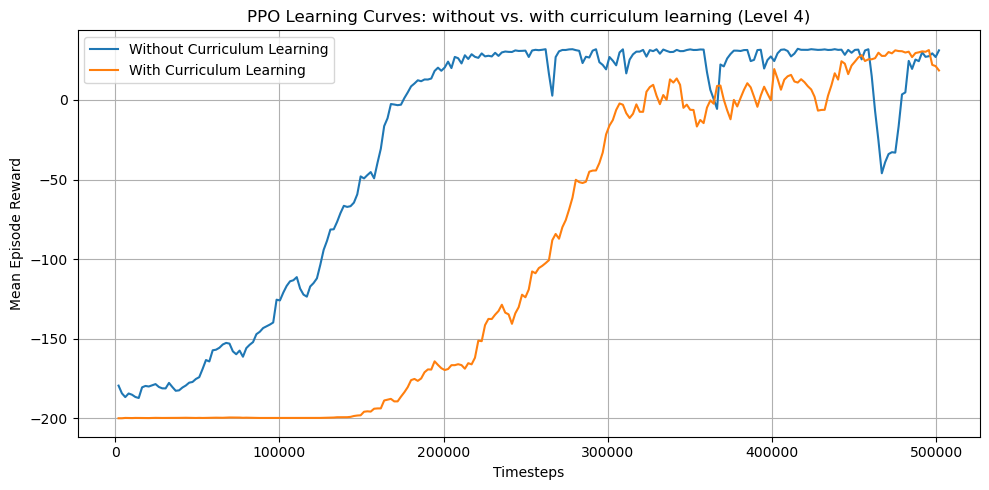

In [7]:
log_dirs = [
    ("logs/general/coverage_lvl4/PPO_1", "Without Curriculum Learning"),
    ("logs/ppo/mlp/l2/coverage_lvl4/PPO_1", "With Curriculum Learning"),
]

plt.figure(figsize=(10, 5))

for path, label in log_dirs:
    # pick the first run subfolder
    run_id = os.listdir(path)[0]
    event_path = os.path.join(path, run_id)

    # load TB scalars
    ea = EventAccumulator(event_path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")

    # extract steps & values
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    # plot
    plt.plot(steps, values, label=label)

plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO Learning Curves: without vs. with curriculum learning (Level 4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
mean_reward, std_reward = evaluate_policy(
    model,
    env_4,
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Mean reward: -88.40 ± 110.47


# **Final Graph**

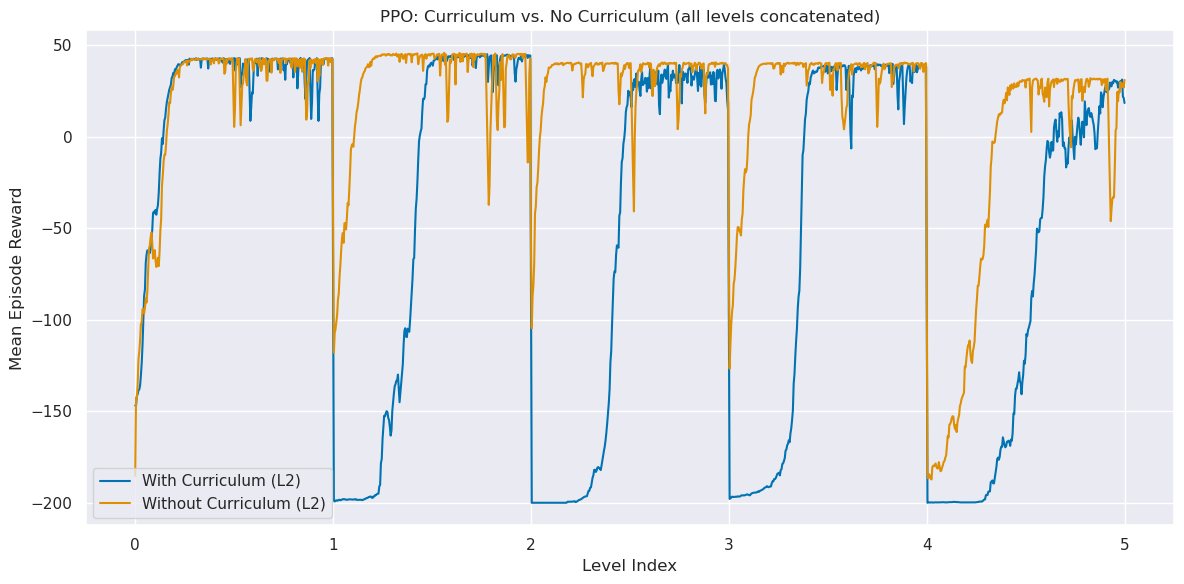

In [10]:
import seaborn as sns

# Seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")

def load_normalized_rewards(log_root):
    """Load and concatenate normalized reward curves from sub-folders coverage_lvl0…coverage_lvlN/PPO_1"""
    run_dirs = sorted(
        [d for d in os.listdir(log_root) if d.startswith("coverage_")],
        key=lambda x: int(x.split("lvl")[-1])
    )
    xs, ys = [], []
    level_index = 0
    for run in run_dirs:
        tb_path = os.path.join(log_root, run, "PPO_1")
        if not os.path.exists(tb_path):
            continue
        ea = EventAccumulator(tb_path); ea.Reload()
        scalars = ea.Scalars("rollout/ep_rew_mean")
        steps = [s.step for s in scalars]
        rewards = [s.value for s in scalars]
        # stretch this level into [level_index, level_index+1]
        norm_x = np.linspace(level_index, level_index + 1, num=len(steps))
        xs.append(norm_x)
        ys.append(rewards)
        level_index += 1
    return np.concatenate(xs), np.concatenate(ys)

# set your two root log-dirs here:
paths = {
    "With Curriculum (L2)":    "logs/ppo/mlp/l2",
    "Without Curriculum (L2)": "logs/general"
}

plt.figure(figsize=(12, 6))
for label, root in paths.items():
    x, y = load_normalized_rewards(root)
    sns.lineplot(x=x, y=y, label=label)

plt.xlabel("Level Index")
plt.ylabel("Mean Episode Reward")
plt.title("PPO: Curriculum vs. No Curriculum (all levels concatenated)")
plt.legend()
plt.tight_layout()
plt.show()
